In [ ]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
!pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 129kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
cd drive/My\ Drive/vessel/sunet

/content/drive/My Drive/vessel/sunet


In [ ]:
import os

import cv2
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from  scipy.misc.pilutil import *


Using TensorFlow backend.


In [ ]:
train_loc = 'data/train/image/'
val_loc = 'data/val/image/'

train_label_loc = 'data/train/label/'
val_label_loc = 'data/val/label/'

In [ ]:
timage = os.listdir(train_loc)
tlabel = os.listdir(train_label_loc)

vimage = os.listdir(val_loc)
vlabel = os.listdir(val_label_loc)

In [ ]:
train_data = []
train_label = []
val_data = []
val_label = []

In [ ]:
def border(image,label,size):
  cur = image.shape[:2]
  dw = size - cur[1]
  dh = size - cur[0]

  top, bottom = dh // 2, dh - (dh // 2)
  left, right = dw // 2, dw - (dw // 2)

  color = [0, 0, 0]
  color2 = [0]

  new_im = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

  new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)
  
  x = cv2.resize(new_im,(size,size))

  y = cv2.resize(new_label, (size, size))
  _, y = cv2.threshold(y, 127, 255, cv2.THRESH_BINARY)

  return x,y

In [ ]:
i=0
for xname,yname in zip(timage,tlabel):
  print(i)

  image = imread(train_loc + xname)
  label = imread(train_label_loc + yname,mode = 'L')

  x,y = border(image,label,592)

  train_data.append(x)
  train_label.append(y)
  i+=1

i=0
for xname,yname in zip(vimage,vlabel):
  print(i)

  image = imread(val_loc + xname)
  label = imread(val_label_loc + yname,mode='L')

  x,y = border(image,label,592)

  val_data.append(x)
  val_label.append(y)
  i+=1

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
train_data = np.array(train_data)
train_label = np.array(train_label)

val_data = np.array(val_data)
val_label  = np.array(val_label)

In [ ]:
print(train_data.shape,val_data.shape,train_label.shape,val_label.shape)

(234, 592, 592, 3) (26, 592, 592, 3) (234, 592, 592) (26, 592, 592)


In [ ]:
size = 592

x_train = train_data.astype('float32')/255
x_train = np.reshape(x_train,(len(x_train),size,size,3))

y_train = train_label.astype('float32')/255
y_train = np.reshape(y_train,(len(y_train),size,size,1))

x_val = val_data.astype('float32')/255
x_val = np.reshape(x_val,(len(x_val),size,size,3))

y_val = val_label.astype('float32')/255
y_val = np.reshape(y_val,(len(y_val),size,size,1))

In [ ]:
pip install keras-drop-block

  Created wheel for keras-drop-block: filename=keras_drop_block-0.5.0-cp36-none-any.whl size=6854 sha256=cae1186e8470e9d9f6034bb2315921ace8bd206d407434478b6f254c7a3fda16
  Stored in directory: /root/.cache/pip/wheels/60/db/ba/01229d7458745b0204a30dc9f6f15526278ef544869b170509
Successfully built keras-drop-block


In [ ]:
from  SA_UNet import *

In [ ]:
model=Backbone(input_size=(size,size,3),start_neurons=16,lr=0.001,keep_prob=0.82,block_size=7)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 592, 592, 3)  0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 592, 592, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
drop_block2d_29 (DropBlock2D)   (None, 592, 592, 16) 0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 592, 592, 16) 64          drop_block2d_29[0][0]            
____________________________________________________________________________________________

/content/drive/My Drive/vessel/sunet/SA_UNet.py:98: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  model = Model(input=inputs, output=output_layer)


In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.load_weights(weights)

In [ ]:
weights="model/SU-net.h5"
model_checkpoint = ModelCheckpoint(weights, monitor='val_accuracy', verbose=1, save_best_only=True)
# ,validation_data=(x_val, y_val)
history=model.fit(x_train, y_train,epochs=100,batch_size=8,validation_data=(x_val, y_val),shuffle=True,callbacks= [model_checkpoint])

Train on 234 samples, validate on 26 samples
Epoch 1/100
234/234 [==============================] - 58s 249ms/step - loss: 0.4188 - accuracy: 0.8590 - val_loss: 0.4663 - val_accuracy: 0.9197

Epoch 00001: val_accuracy improved from -inf to 0.91967, saving model to model/SU-net.h5
Epoch 2/100
234/234 [==============================] - 46s 196ms/step - loss: 0.3167 - accuracy: 0.9124 - val_loss: 0.3534 - val_accuracy: 0.9197

Epoch 00002: val_accuracy did not improve from 0.91967
Epoch 3/100
234/234 [==============================] - 46s 195ms/step - loss: 0.2870 - accuracy: 0.9167 - val_loss: 0.2766 - val_accuracy: 0.9197

Epoch 00003: val_accuracy did not improve from 0.91967
Epoch 4/100
234/234 [==============================] - 46s 195ms/step - loss: 0.2722 - accuracy: 0.9178 - val_loss: 0.2959 - val_accuracy: 0.9197

Epoch 00004: val_accuracy did not improve from 0.91967
Epoch 5/100
234/234 [==============================] - 46s 195ms/step - loss: 0.2657 - accuracy: 0.9178 - val_los

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


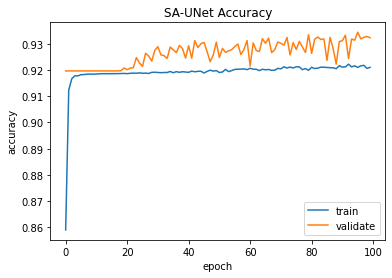

In [ ]:

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SA-UNet Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [ ]:
def testborder(image,size):
  cur = image.shape[:2]
  dw = size - cur[1]
  dh = size - cur[0]

  top, bottom = dh // 2, dh - (dh // 2)
  left, right = dw // 2, dw - (dw // 2)

  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)
  
  x = cv2.resize(new_im,(size,size))

  return x

In [ ]:
pmodel = SA_UNet(input_size=(size,size,3),start_neurons=16,lr=0.001,keep_prob=0.82,block_size=7)
pmodel.load_weights('SA_UNet.h5')

In [ ]:
test_loc = 'datasets/test/images/'

test_files = os.listdir(test_loc)
test_data = []
size=592

In [ ]:
i=0
for xname in test_files:
  print(i)

  image = imread(test_loc + xname)
  x = testborder(image,592)

  test_data.append(x)
  i+=1

test_data = np.array(test_data)
x_test = test_data.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), size, size, 3))

In [ ]:
y_pred = pmodel.predict(x_val)
# pred = pmodel.predict(x_test)

In [ ]:
print(y_pred.shape,y_val.shape)

(26, 592, 592, 1) (26, 592, 592, 1)


In [ ]:
test = y_pred.copy()
p = cv2.normalize(test,test,0,255,cv2.NORM_MINMAX)

In [ ]:
p[p<=64] = 0
p[p>64]= 1

In [ ]:
predicted = p.flatten()
ground= y_val.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
con_mat = confusion_matrix(ground,predicted)
print(con_mat)

[[7914686  465413]
 [ 283220  448745]]


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

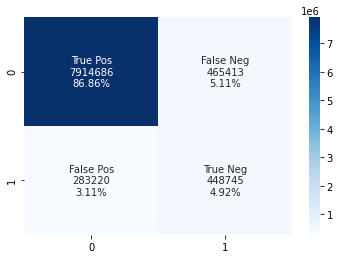

In [ ]:
cf_matrix = np.array([[7914686,465413],[ 283220,448745]])

names = ['True Pos','False Neg','False Pos','True Neg']
counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels,fmt = '',  cmap='Blues')

In [ ]:
accuracy = accuracy_score(ground,predicted)
sensitivity = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
specificity = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])

print('accuracy : ',accuracy)
print('sensitivity : ',sensitivity)
print('specificity : ',specificity)

accuracy :  0.9178415559855594
sensitivity :  0.9444621119631165
specificity :  0.6130689308915044


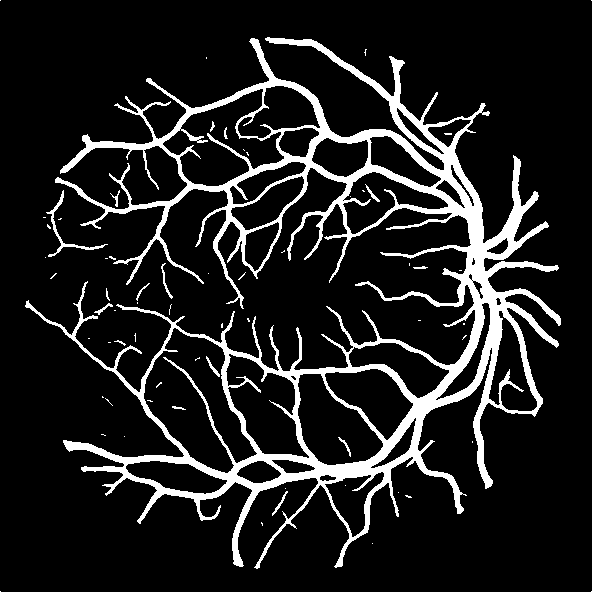

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(p[2])
cv2.waitKey(0)

In [ ]:
pred = 